In [31]:
import argparse
import logging
from pathlib import Path
from typing import Literal, Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import (
    calculate_weights,
    get_available_trackers,
    load_trackers,
    get_rebalance_dates,
    cap_long_only_weights,
)
from backtest import backtest2
from entities import FX_TRACKER_DICT, EM_CDS_TRACKER_DICT

from bwlogger import StyleAdapter, basic_setup
from bwutils import open_file
from portfolio.construction import calculate_weights as calculate_weights_fh

In [55]:
FOLDER = Path("C:/Users/pcampos/OneDrive - Insper - Instituto de Ensino e Pesquisa/Dissertação Mestrado/Analysis/backtests")
list_series = []
for file_path in FOLDER.glob("*.xlsx"):
    s_backtest = pd.read_excel(file_path, index_col=0)["backtest"]
    s_backtest.name = file_path.stem
    list_series.append(s_backtest)
df_backtest = pd.concat(list_series, axis=1)


C:\Users\pcampos\AppData\Local\Temp\ipykernel_20172\860385761.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(
C:\Users\pcampos\AppData\Local\Temp\ipykernel_20172\860385761.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(


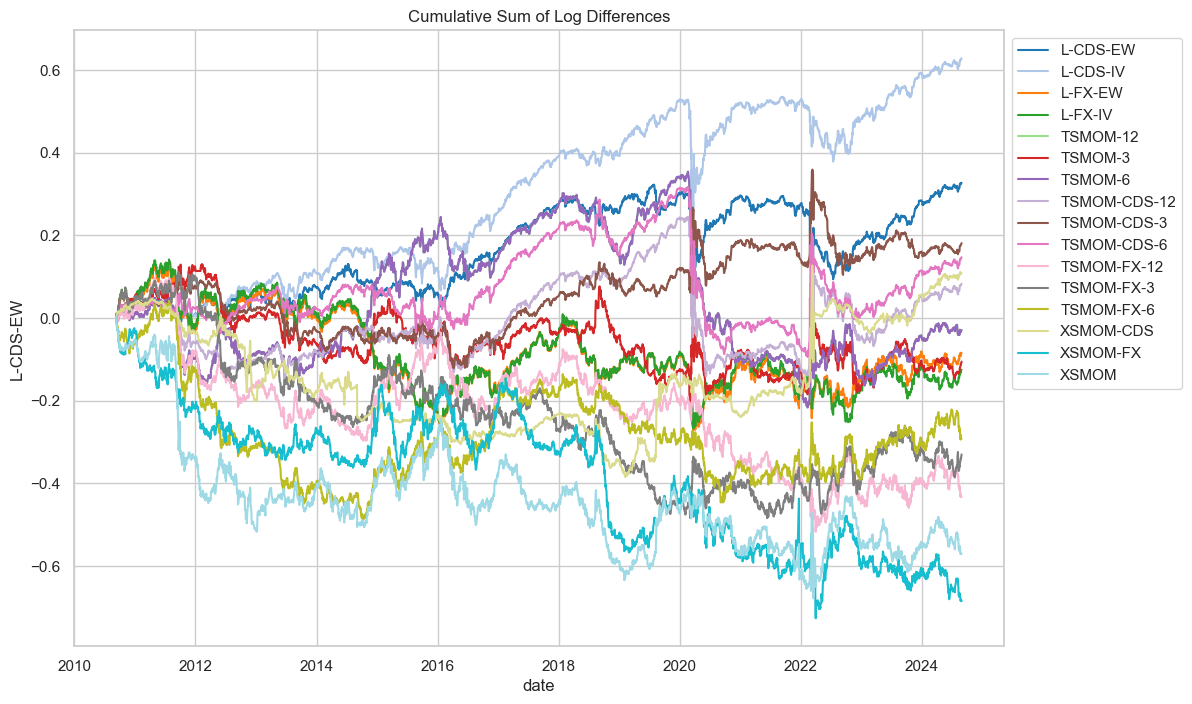

In [54]:
import seaborn as sns
# Assuming df_backtest is already defined
sns.set(style="whitegrid")
data = np.log(df_backtest.dropna(how="any")).diff(1).cumsum()
# Create the plot
colors = plt.cm.get_cmap(
    "tab20", len(data.columns)
)  # Get a colormap with enough colors

# Create the plot
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap(
    "tab20", len(data.columns)
)  # Get a colormap with enough colors

for i, column in enumerate(data.columns):
    sns.lineplot(data=data[column], color=colors(i), label=column)

# Add legend and display the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Cumulative Sum of Log Differences")
plt.show()